
# Lab 3: Clustering Analysis Using K-Means vs K-Medoids Algorithms
**Name:** Gregory Renteria  
**Course:** MSCS-634-M20  



## Step 1: Load and Prepare the Dataset

In [26]:

# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import KMeans

# For K-Medoids
from sklearn_extra.cluster import KMedoids




### Load Dataset

In [27]:

# Load wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for easier exploration
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Display first few rows
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0



### Basic Exploration


In [28]:

# Dataset shape
print("Dataset shape:", df.shape)

# Class distribution
print("\nClass distribution:")
print(df['target'].value_counts())

# Summary statistics
df.describe()


Dataset shape: (178, 14)

Class distribution:
target
1    71
0    59
2    48
Name: count, dtype: int64


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000



### Standardize the Dataset

In [29]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Step 2: Implement K-Means Clustering

In [30]:

# K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Evaluation metrics
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
kmeans_ari = adjusted_rand_score(y, kmeans_labels)

print("K-Means Silhouette Score:", kmeans_silhouette)
print("K-Means Adjusted Rand Index:", kmeans_ari)


K-Means Silhouette Score: 0.2848589191898987
K-Means Adjusted Rand Index: 0.8974949815093207



### K-Means Clustering Results
The K-Means algorithm was applied with k = 3 to match the number of classes in the Wine dataset.  
The Silhouette Score measures how well-separated the clusters are, while the Adjusted Rand Index (ARI) compares the clustering results to the true class labels.  

A higher Silhouette Score indicates more compact and well-separated clusters, and a higher ARI indicates better alignment with the actual classes.



## Step 3: Implement K-Medoids Clustering


In [31]:

# K-Medoids with k=3
kmedoids = KMedoids(n_clusters=3, random_state=42, method='pam')
kmedoids_labels = kmedoids.fit_predict(X_scaled)

# Evaluation metrics
kmedoids_silhouette = silhouette_score(X_scaled, kmedoids_labels)
kmedoids_ari = adjusted_rand_score(y, kmedoids_labels)

print("K-Medoids Silhouette Score:", kmedoids_silhouette)
print("K-Medoids Adjusted Rand Index:", kmedoids_ari)


K-Medoids Silhouette Score: 0.2676220575785755
K-Medoids Adjusted Rand Index: 0.7411365432162113



### K-Medoids Clustering Results
The K-Medoids algorithm was applied with k = 3 using the same standardized dataset.  
Like in the K-Means step, the Silhouette Score evaluates cluster separation, and the Adjusted Rand Index (ARI) measures how closely the clusters match the true labels.  

Comparing these values with those from K-Means helps determine which algorithm produced better clustering performance.



## Step 4: Visualize and Compare Results
We'll use PCA to reduce the data to 2D for visualization

In [32]:

from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



### Plot Clusters Side by Side


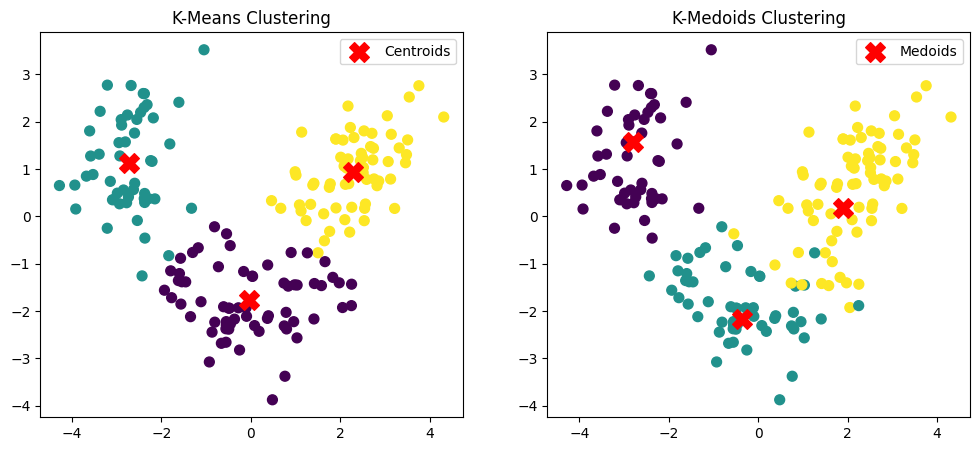

In [33]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- K-Means Plot ----
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
centroids_pca = pca.transform(kmeans.cluster_centers_)
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1],
                c='red', marker='X', s=200, label='Centroids')
axes[0].set_title("K-Means Clustering")
axes[0].legend()

# ---- K-Medoids Plot ----
axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=kmedoids_labels, cmap='viridis', s=50)
medoids_pca = pca.transform(kmedoids.cluster_centers_)
axes[1].scatter(medoids_pca[:, 0], medoids_pca[:, 1],
                c='red', marker='X', s=200, label='Medoids')
axes[1].set_title("K-Medoids Clustering")
axes[1].legend()

plt.show()



### Cluster Visualization
To visualize the clustering results, the dataset was reduced to two dimensions using Principal Component Analysis (PCA).  
The scatter plots show how the data points are grouped by each algorithm, with centroids or medoids marked for reference.  

This visual comparison helps illustrate differences in cluster shapes, separation, and positioning between K-Means and K-Medoids.



## Clustering Comparison Analysis

### Performance Metrics
| Algorithm | Silhouette Score | Adjusted Rand Index |
|-----------|------------------|----------------------|
| K-Means   | 0.2849           | 0.8975               |
| K-Medoids | 0.2676           | 0.7411               |

### Observations
- **K-Means produced better overall clustering performance** than K-Medoids.
- The **Silhouette Score** for K-Means (0.2849) is slightly higher than for K-Medoids (0.2676), indicating that K-Means formed slightly more compact and better-separated clusters.
- The **Adjusted Rand Index (ARI)** shows a much larger difference:
  - K-Means: **0.8975**
  - K-Medoids: **0.7411**
- This means the clusters produced by K-Means more closely match the true wine class labels.

### Cluster Shape and Position
- **K-Means** created clusters that align closely with the actual class structure, suggesting the data is fairly well-separated and suitable for mean-based clustering.
- **K-Medoids** produced slightly less accurate clusters, possibly because it uses actual data points as centers, which can limit how well the clusters represent the overall distribution.

### Which Algorithm Performed Better?
Based on both the Silhouette Score and the Adjusted Rand Index, **K-Means clearly performed better** on the Wine dataset.

### When to Use Each Algorithm

**K-Means is preferable when:**
- The dataset is large.
- Clusters are spherical and well separated.
- You want faster computation.
- The data has few outliers.

**K-Medoids is preferable when:**
- The dataset contains noise or outliers.
- You want cluster centers that are actual data points.
- Robustness is more important than speed.

### Conclusion
In this experiment, **K-Means was more effective** at identifying the natural class structure of the Wine dataset. This suggests the dataset has characteristics (such as relatively spherical and well-separated clusters) that favor the K-Means algorithm.